In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect = True)
Base.classes.keys()
# reflect the tables
Measurement = Base.classes.measurement
Station = Base.classes.station


In [6]:
# View all of the classes that automap found


In [7]:
# Save references to each table


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
inspector = inspect(engine)
columns_m = inspector.get_columns('measurement')
columns_s = inspector.get_columns('station')

recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent
columns_m

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

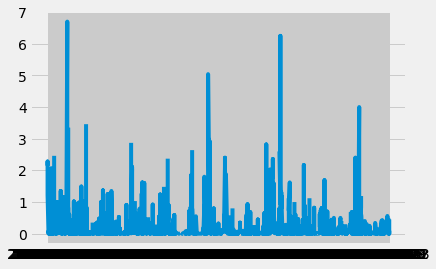

,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').all()
prcp_data

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data).rename(columns={0: "date", 1: "prcp"})\
                                    .set_index('date')\
                                    .sort_values(by='date', ascending=True)



# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
y = prcp_df['prcp']

plt.plot(y)
plt.show()
prcp_df.head()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_summary = prcp_df.describe()
prcp_summary
prcp_data

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station).count()
total_stations
unique_stations = session.query(Measurement.station).distinct().all()
unique_stations

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, 
                                func.count(Measurement.station))\
                                                                .group_by(Measurement.station)\
                                                                .order_by(func.count(Measurement.station)\
                                                                .desc())\
                                                                .all()                                                               
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps_query = session.query(func.min(Measurement.tobs),
                   func.max(Measurement.tobs),
                   func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
temps = [{'low': x[0], 'high': x[1], 'average': x[2]} for x in temps_query]
temps

[{'low': 54.0, 'high': 85.0, 'average': 71.66378066378067}]

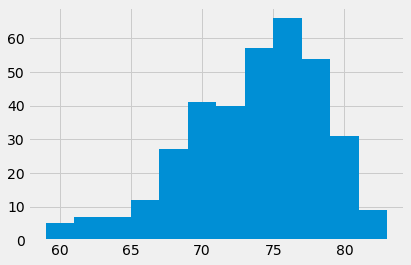

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
recent = session.query(Measurement.date).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first()

year_temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281', 
                                                                     Measurement.date > '2016-08-18').all()


year_df = pd.DataFrame(year_temps).rename(columns={0: "date", 1: "tobs"})\
                                    .set_index('date')
year_df


plt.hist(year_df['tobs'], bins = 12)
plt.show()

In [25]:
start = '2010-08-23'
end = '2011-08-23'

start_date = dt.datetime.strptime(start, '%Y-%m-%d')
end_date = dt.datetime.strptime(end, '%Y-%m-%d')

tobs_query = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date.between(start_date, end_date)).all()

tobs_query

tobs_json = [{'low': x[0], 'average': x[1], 'high': x[2]} for x in tobs_query]
tobs_json

[{'low': 56.0, 'average': 72.68983768525052, 'high': 87.0}]

# Close session

In [ ]:
# Close Session
session.close()